In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\tatia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import cv2
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


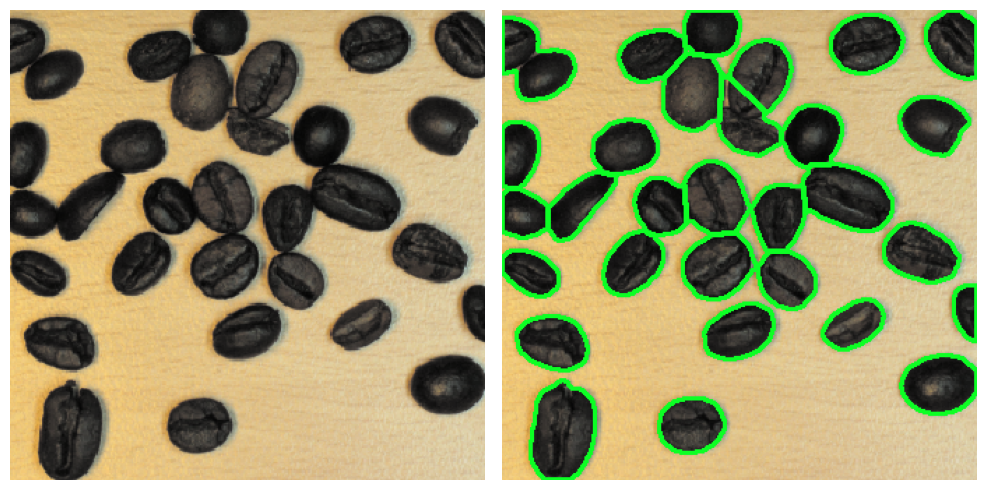

In [3]:
img = cv2.imread('img/coffee.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

smoothed = cv2.GaussianBlur(gray_img, (7,7), 1.5)
ret, bin_img = cv2.threshold(smoothed, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

morph_kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, morph_kernel, iterations=1)

dist_transform = ndimage.distance_transform_edt(cleaned)
peaks = peak_local_max(dist_transform, min_distance=15, labels=cleaned)
marker_mask = np.zeros(dist_transform.shape, dtype=bool)
marker_mask[tuple(peaks.T)] = True
markers = ndimage.label(marker_mask)[0]
segmented = watershed(-dist_transform, markers, mask=cleaned)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()

result = img.copy()
for region in np.unique(segmented):
    if region == 0:
        continue
    region_mask = (segmented == region).astype(np.uint8)*255
    cnts = cv2.findContours(region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    cv2.drawContours(result, cnts, -1, (36,255,12), 2)

ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.set_axis_off()
plt.tight_layout()

(np.float64(-0.5), np.float64(255.5), np.float64(253.5), np.float64(-0.5))

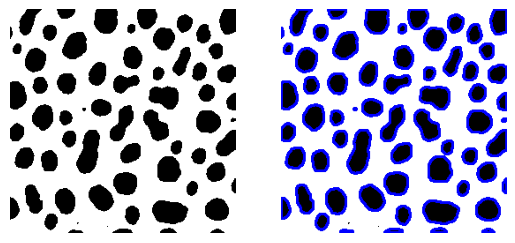

In [4]:
img = cv2.imread('img/blobs.png', 0)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

blur = cv2.GaussianBlur(img, (7,7), 1.5)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

cnts = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]

output = color_img.copy()
cv2.drawContours(output, cnts, -1, (255,0,0), 2)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].axis('off')

(np.float64(-0.5), np.float64(256.5), np.float64(256.5), np.float64(-0.5))

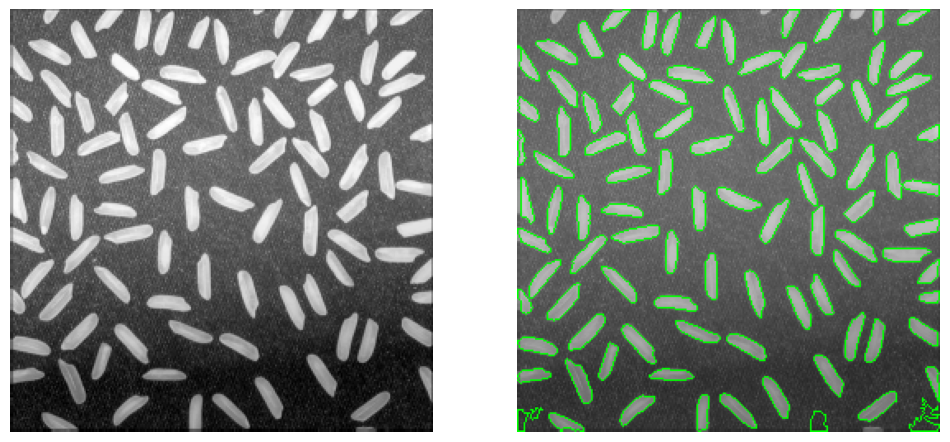

In [5]:
img_grayscale = cv2.imread('img/rice.tif', cv2.IMREAD_GRAYSCALE)
img_bgr = cv2.cvtColor(img_grayscale, cv2.COLOR_GRAY2BGR)

img_smoothed = cv2.bilateralFilter(img_grayscale, 27, 62, 62)
contrast_adjust = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
img_adjusted = contrast_adjust.apply(img_smoothed)
gauss1 = cv2.GaussianBlur(img_adjusted, (5,5), 0.5)
gauss2 = cv2.GaussianBlur(img_adjusted, (15,15), 7.5)
diff_gauss = gauss1 - gauss2
_, img_thresh = cv2.threshold(diff_gauss, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

area_minima = 50
contornos, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_resultado = img_bgr.copy()
contador = 0

for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > area_minima:
        cv2.drawContours(img_resultado, [contorno], -1, (0,255,0), 1)
        contador += 1

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(img_grayscale, cmap='gray')
ax1.axis('off')
ax2.imshow(cv2.cvtColor(img_resultado, cv2.COLOR_BGR2RGB))
ax2.axis('off')

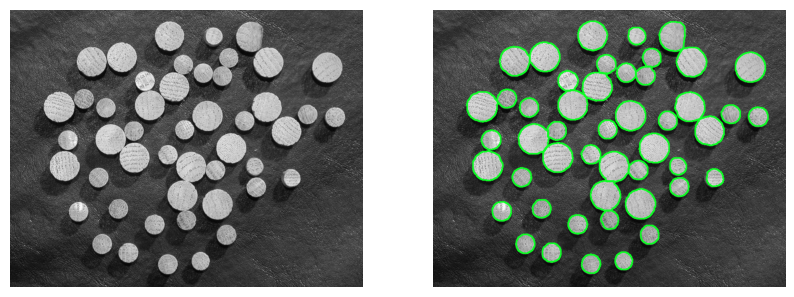

In [6]:
src = cv2.imread('img/dowels.tif')
gray_img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
smoothed = cv2.GaussianBlur(gray_img, (9,9), 2)

ret, bin_img = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

n_cc, cc_labels = cv2.connectedComponents(bin_img)
processed = np.zeros_like(bin_img)
for i in range(1, n_cc):
    if np.count_nonzero(cc_labels == i) > 200:
        processed[cc_labels == i] = 255

dist_map = ndimage.distance_transform_edt(processed)
peaks = peak_local_max(dist_map, 30, labels=processed)
marker_mask = np.zeros(dist_map.shape, bool)
marker_mask[tuple(peaks.T)] = True
markers = ndimage.label(marker_mask)[0]
seg_result = watershed(-dist_map, markers, mask=processed)

result_img = src.copy()
for seg in np.unique(seg_result):
    if seg == 0:
        continue
    seg_mask = (seg_result == seg).astype(np.uint8)*255
    contours = cv2.findContours(seg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    cv2.drawContours(result_img, contours, -1, (36,255,12), 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()
ax2.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
ax2.set_axis_off()

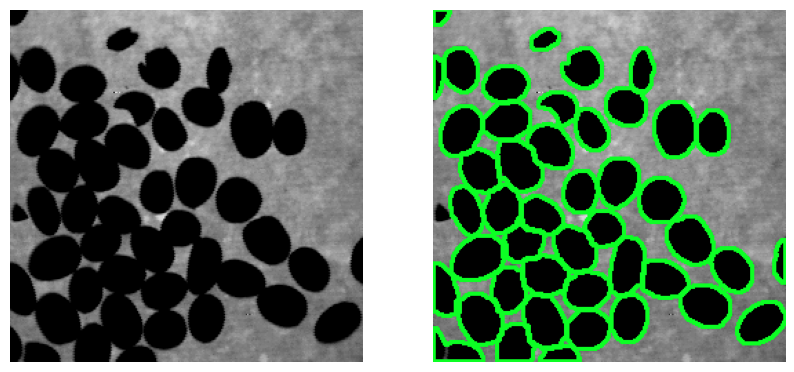

In [7]:
img = cv2.imread('img/beans.png')
gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
smooth = cv2.GaussianBlur(gray_scale, (5,5), 0)
_, bin_img = cv2.threshold(smooth, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

struct_elem = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, struct_elem, iterations=2)

dist = ndimage.distance_transform_edt(morph)
dist = cv2.GaussianBlur(dist.astype(np.float32), (5,5), 0.5)
peaks = peak_local_max(dist, 7, footprint=np.ones((3,3)), labels=morph)
peak_mask = np.zeros(dist.shape, bool)
peak_mask[tuple(peaks.T)] = True
markers = ndimage.label(peak_mask)[0]
seg = watershed(-dist, markers, mask=morph)

result = img.copy()
for seg_id in np.unique(seg):
    if seg_id == 0:
        continue
    seg_area = (seg == seg_id).astype(np.uint8)*255
    cnts = cv2.findContours(seg_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    if cnts and cv2.contourArea(cnts[0]) >= 100:
        cv2.drawContours(result, cnts, -1, (36,255,12), 2)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()
ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.set_axis_off()

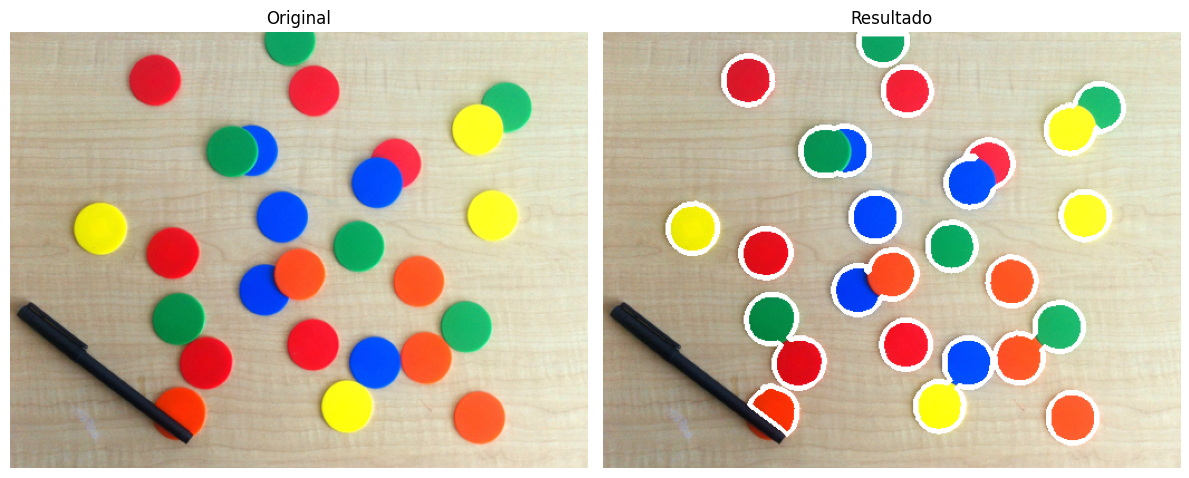

In [8]:
def processar_imagem(caminho):
    img_original = cv2.imread(caminho)
    copia_original = img_original.copy()
    img_hsv = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)
    
    img_cinza = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
    img_filtrada = cv2.bilateralFilter(img_cinza, 20, 100, 100)
    equalizador = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    img_equalizada = equalizador.apply(img_filtrada)
    
    canal_h = img_hsv[:,:,0]
    histograma = cv2.calcHist([canal_h], [0], None, [180], [0, 180]).ravel()
    picos, _ = find_peaks(histograma, height=np.max(histograma)*0, distance=10)
    
    mascaras = []
    elemento = np.ones((7, 7), np.uint8)
    
    for pico in picos:
        limite_inf = np.array([max(0, pico-2), 60, 60])
        limite_sup = np.array([min(179, pico+8), 255, 255])
        mascara = cv2.inRange(img_hsv, limite_inf, limite_sup)
        mascara = cv2.morphologyEx(mascara, cv2.MORPH_OPEN, elemento, iterations=2)
        mascara = cv2.morphologyEx(mascara, cv2.MORPH_CLOSE, elemento, iterations=2)
        mascaras.append(mascara)
    
    mascara_combinada = np.zeros_like(img_cinza)
    for m in mascaras:
        mascara_combinada = cv2.bitwise_or(mascara_combinada, m)
    
    fundo = cv2.dilate(mascara_combinada, elemento, iterations=3)
    dist_transform = cv2.distanceTransform(mascara_combinada, cv2.DIST_L2, 5)
    _, frente = cv2.threshold(dist_transform, 0.3*dist_transform.max(), 255, 0)
    frente = np.uint8(frente)
    
    desconhecido = cv2.subtract(fundo, frente)
    _, marcadores = cv2.connectedComponents(frente)
    marcadores = marcadores + 1
    marcadores[desconhecido == 255] = 0
    
    marcadores = cv2.watershed(img_original, marcadores)
    
    mascara_final = np.zeros_like(img_cinza, dtype=np.uint8)
    mascara_final[marcadores > 1] = 255
    
    contornos, _ = cv2.findContours(mascara_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    resultado = copia_original.copy()
    cv2.drawContours(resultado, contornos, -1, (255, 255, 255), 3)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(cv2.cvtColor(copia_original, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    ax2.set_title('Resultado')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

processar_imagem('img/chips.png')

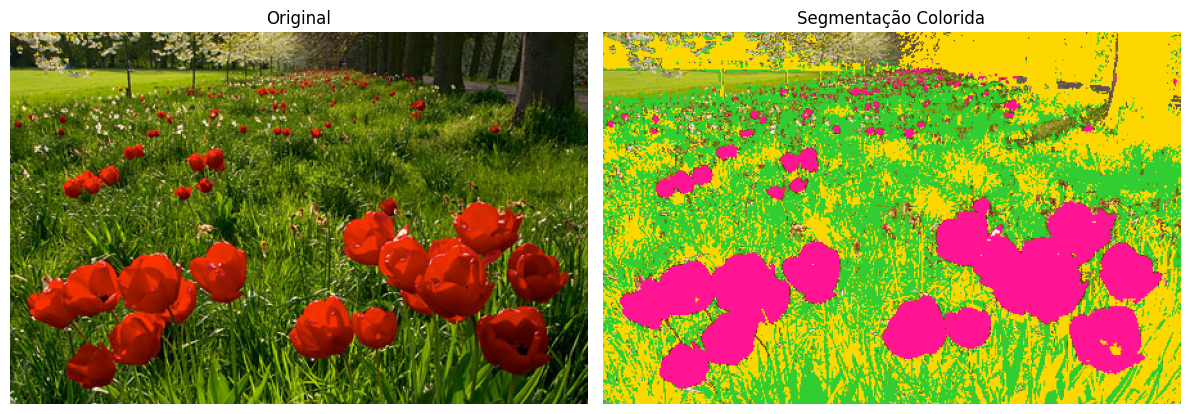

In [9]:
import matplotlib.colors as mcolors

img = cv2.imread('img/flowers.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Intervalos de cores (mantidos os mesmos)
red_low1, red_high1 = np.array([0, 70, 50]), np.array([10, 255, 255])
red_low2, red_high2 = np.array([170, 70, 50]), np.array([180, 255, 255])
mask_red = cv2.inRange(img_hsv, red_low1, red_high1) | cv2.inRange(img_hsv, red_low2, red_high2)

green_low, green_high = np.array([35, 40, 40]), np.array([85, 255, 255])
mask_green = cv2.inRange(img_hsv, green_low, green_high)

dark_low, dark_high = np.array([0, 0, 0]), np.array([180, 255, 80])
mask_dark = cv2.inRange(img_hsv, dark_low, dark_high) & ~mask_red

# Aplicando novas cores (alteradas)
output = img_rgb.copy()
output[mask_red>0] = np.array(mcolors.to_rgb('deeppink')) * 255
output[mask_green>0] = np.array(mcolors.to_rgb('limegreen')) * 255 
output[mask_dark>0] = np.array(mcolors.to_rgb('gold')) * 255

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(img_rgb)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(output)
ax2.set_title('Segmentação Colorida')
ax2.axis('off')

plt.tight_layout()
plt.show()